In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Model

In [2]:
import tensorflow as tf

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train,y_train) , (X_test,y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train , X_test = X_train/255.0 , X_test/255.0

In [7]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
K = len(set(y_train))

In [10]:
K

10

In [11]:
i = Input(shape=(X_train[0].shape))
x = Conv2D(32 , (3,3) , strides = 2 ,activation='relu')(i)
x = Conv2D(64 , (3,3) , strides = 2 ,activation='relu')(x)
x = Conv2D(128 , (3,3) , strides = 2 ,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512 , activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [12]:
model = Model(i,x)

In [13]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
r = model.fit(X_train,y_train , epochs = 10 , validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5194 - accuracy: 0.8084 - val_loss: 0.4022 - val_accuracy: 0.8432
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3565 - accuracy: 0.8657 - val_loss: 0.3494 - val_accuracy: 0.8698
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3092 - accuracy: 0.8832 - val_loss: 0.3208 - val_accuracy: 0.8808
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2787 - accuracy: 0.8951 - val_loss: 0.3031 - val_accuracy: 0.8917
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2524 - accuracy: 0.9050 - val_loss: 0.3184 - val_accuracy: 0.8858
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2309 - accuracy: 0.9120 - val_loss: 0.3002 - val_accuracy: 0.9001
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2137 - accuracy: 0.9189 - val_loss: 0.2935 - val_ac

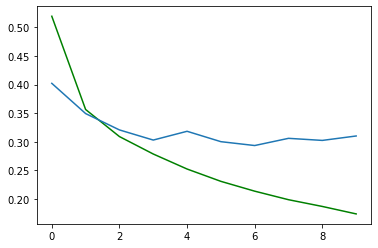

In [21]:
plt.plot(r.history['loss'] , label = 'loss' , color = 'green')
plt.plot(r.history['val_loss'] , label = 'Val_loss')

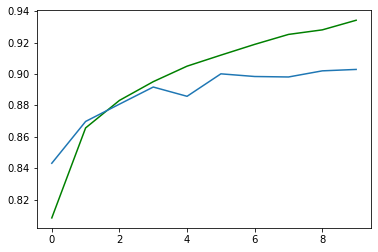

In [22]:
plt.plot(r.history['accuracy'] , label = 'acc' , color = 'green')
plt.plot(r.history['val_accuracy'] , label = 'val_accuracy')

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train,model.predict(X_train))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [26]:
y_pred_train = model.predict(X_train)

In [27]:
y_pred_train.shape

(60000, 10)

In [28]:
y_train.shape

(60000,)

In [35]:
y_pred_train = np.array([np.argmax(x) for x in y_pred_train])

In [37]:
y_pred_train.shape

(60000,)

In [40]:
cf = confusion_matrix(y_train,y_pred_train)

In [39]:
import seaborn as sns

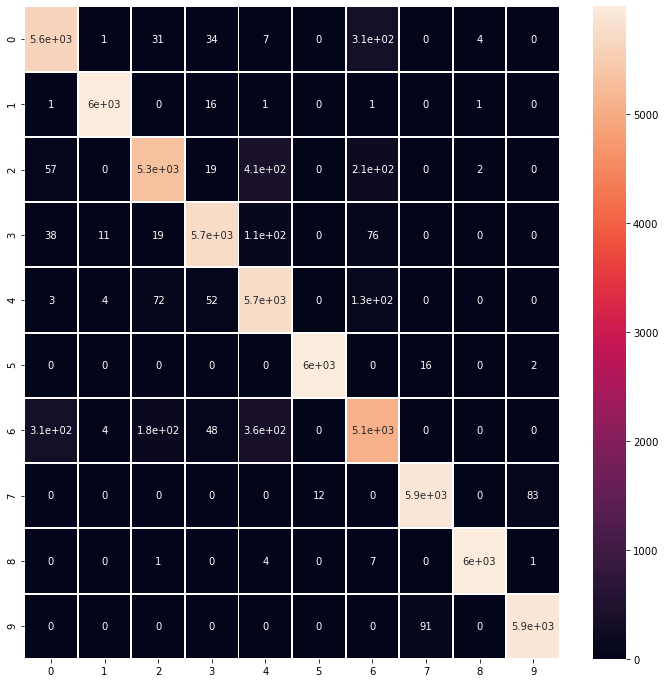

In [46]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(cf , annot=True , linewidths=.9, ax=ax)